# Importing the Data

In [1]:
import problem
import utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = problem.get_train_data(path="../")
X_train: pd.DataFrame = data[0]
y_train: pd.DataFrame = data[1]
data_test = problem.get_test_data(path="../")
X_test: pd.DataFrame = data_test[0]
y_test: pd.DataFrame = data_test[1]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509834 entries, 1997-10-01 00:00:00 to 2007-12-31 23:50:00
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   B           509834 non-null  float32
 1   Bx          509834 non-null  float32
 2   Bx_rms      509834 non-null  float32
 3   By          509834 non-null  float32
 4   By_rms      509834 non-null  float32
 5   Bz          509834 non-null  float32
 6   Bz_rms      509834 non-null  float32
 7   Na_nl       509834 non-null  float32
 8   Np          509834 non-null  float32
 9   Np_nl       509834 non-null  float32
 10  Range F 0   509834 non-null  float32
 11  Range F 1   509834 non-null  float32
 12  Range F 10  509834 non-null  float32
 13  Range F 11  509834 non-null  float32
 14  Range F 12  509834 non-null  float32
 15  Range F 13  509834 non-null  float32
 16  Range F 14  509834 non-null  float32
 17  Range F 2   509834 non-null  float32
 18  Range F 3 

# Visualizing the data

In [3]:
def get_solarstorms(X):
    filter_solarstorm = y_train == 1
    filter_classic = y_train == 0
    X_solarstorm, y_solarstorm = X[filter_solarstorm], y_train[filter_solarstorm]
    X_classic, y_classic = X[filter_classic], y_train[filter_classic]

    return X_classic, y_classic, X_solarstorm, y_solarstorm

X_classic, y_classic, X_solarstorm, y_solarstorm = get_solarstorms(X_train)

In [4]:
def describe(X, columns: list):
    plt.figure()
    X[columns].plot(kind="kde")
    plt.figure()
    X.boxplot(column=columns)
    print(X[columns].describe())
    plt.show()

X_train.describe()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
count,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,...,5.098340e+05,5.098340e+05,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,5.098340e+05,5.098340e+05,509834.000000
mean,6.618241,-0.116903,0.349193,0.175771,0.382512,0.048810,0.441394,0.241324,8.514418,6.261351,...,1.408352e+09,2.496849e+09,446.682709,39.515217,-442.086670,-2.459462,-2.569139,7.562124e-01,2.195595e-15,0.117950
std,6.588211,5.086633,0.395332,5.073081,0.421456,5.693224,0.481742,0.313865,1180.652832,45.900372,...,1.384293e+09,2.492037e+09,119.224915,20.504719,110.814835,49.024765,39.597439,1.997131e+01,5.730285e-15,0.096591
min,0.265439,-627.767090,0.021706,-235.912567,0.020630,-64.567726,0.017230,-8.387888,0.028063,0.038368,...,0.000000e+00,0.000000e+00,27.204723,4.499917,-1510.373169,-9046.032227,-3448.573730,2.245404e-07,5.024297e-20,0.001278
25%,4.274620,-3.032881,0.138021,-2.865887,0.150889,-1.817907,0.177674,0.092080,3.299438,2.891332,...,6.702708e+08,1.178271e+09,363.626076,25.233902,-504.544746,-16.727910,-14.483639,2.436706e-01,1.116204e-15,0.057407
50%,5.659535,-0.176959,0.253549,0.216375,0.274668,-0.004539,0.321382,0.158681,5.156705,4.616244,...,1.076248e+09,1.954434e+09,422.142212,35.519648,-419.516281,-4.281143,-2.402109,4.799992e-01,1.596067e-15,0.096055
75%,7.691845,2.842238,0.437566,3.102099,0.481610,1.772896,0.554418,0.278809,8.260030,7.598074,...,1.717871e+09,3.013703e+09,508.262398,49.010423,-361.513641,10.149143,8.786250,8.278563e-01,2.388373e-15,0.151583
max,1419.378296,467.822205,17.482304,571.322571,21.112930,1137.248291,24.211935,13.201321,843014.062500,31596.484375,...,5.740399e+10,7.634294e+10,10663.779297,816.426636,3732.478271,6255.307129,7029.354980,1.421069e+04,2.069267e-12,7.750694


In [ ]:
describe(X_train, ["B"])

In [ ]:
describe(X_solarstorm, ["B"])

(<Figure size 1500x400 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: ylabel='Beta'>], dtype=object))

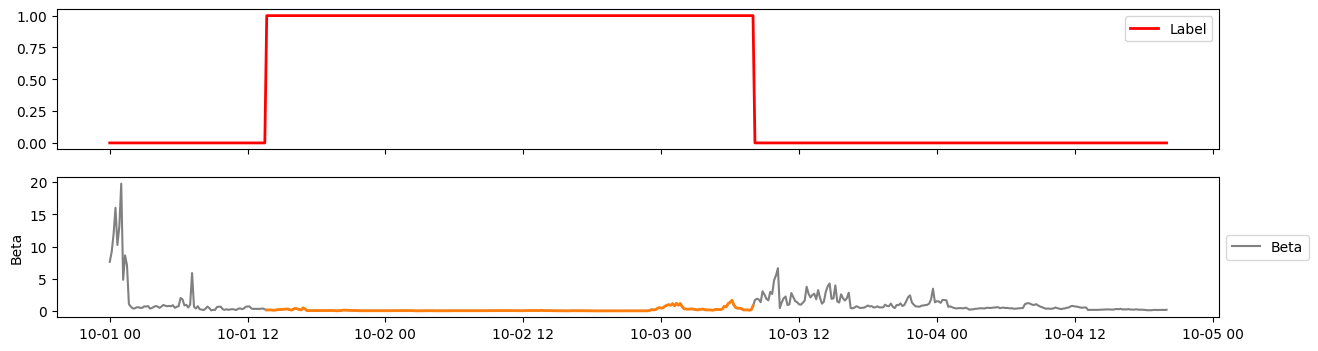

In [3]:
from problem import turn_prediction_to_event_list

events = turn_prediction_to_event_list(y_train)
def plot_event(event_index, data, labels, features, events=turn_prediction_to_event_list(y_train), maxRange=None,  delta=36, size=4):

    start = pd.to_datetime(events[event_index].begin)
    end = pd.to_datetime(events[event_index].end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    area_of_interest = data[start:end]
    labels_of_interest = labels[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]

    fig, axes = plt.subplots(nrows=len(features) + 1, ncols=1, figsize=(15,size), sharex=True)

    def plot(i, ax):
        ax.plot(subset.index, subset[features[i-1]], color='gray', linewidth=1.5)
        ax.plot(area_of_interest.index, area_of_interest[features[i-1]], color=f'C{i}', linewidth=2)
        ax.legend([features[i-1]], loc='center left', bbox_to_anchor=(1, 0.5))
        ax.set_ylabel(features[i-1])
        if maxRange is not None and i < len(maxRange):
            ax.set_ylim(maxRange[i-1][0], maxRange[i-1][1])

    axes[0].plot(labels_of_interest.index, labels_of_interest.values, color='red', linewidth=2, label="Label")
    axes[0].legend()

    i = 1
    for ax in axes[1:]:
        plot(i, ax)
        i += 1

    # add vertical lines
    for ax in axes:
        ax.xaxis.grid(True, which="minor")

    return fig, axes

plot_event(
    0,
    X_train,
    y_train,
    ['Beta'],
    maxRange=[[-0.05, 1.7]],
    size=4
)

(509834,) (509834,)


(<Figure size 1500x400 with 1 Axes>, <AxesSubplot: ylabel='Beta'>)

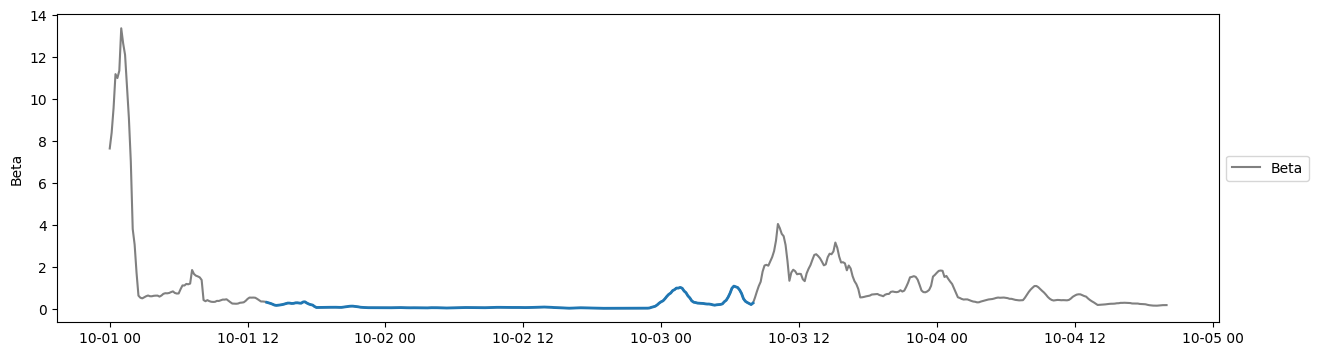

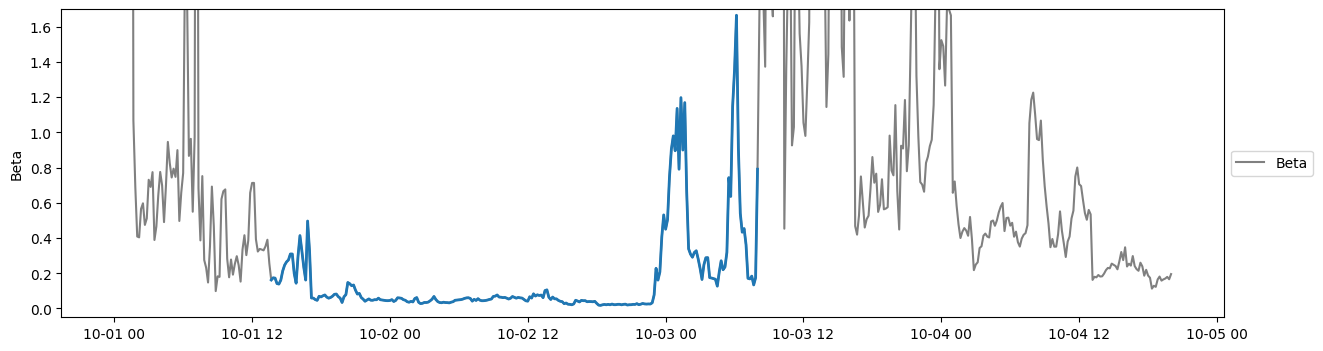

In [80]:
from scipy.interpolate import make_interp_spline

def denoise(X_df: pd.DataFrame, feature, threshold):
    fft_transform = np.fft.fft(X_df[feature].values)
    fft_transform[fft_transform > threshold] = 0
    denoised = np.fft.ifft(fft_transform)
    X_df[feature] = denoised
    return X_df

def smooth(X_df: pd.DataFrame, feature, time_window, center=False):
    X_df[feature] = X_df[feature].rolling(time_window, center=center).mean()
    return X_df

def interpolate(X_df: pd.DataFrame, feature, k=3):
    indexes = X_df.index.values.astype(float)
    values = X_df[feature].values
    print(indexes.shape, values.shape)
    bspl = make_interp_spline(indexes, values, k)
    X_df[feature] = bspl(values)
    return X_df

X_fft = X_train.copy(deep=True)
X_fft = denoise(X_fft, 'Beta', 5*10e3)

X_mean = X_train.copy(deep=True)
X_mean = smooth(X_mean, 'Beta', '1h')

X_interpolated = X_train.copy(deep=True)
X_interpolated = interpolate(X_interpolated, 'Beta', k=21)

plot_event(
    0,
    X_mean,
    y_train,
    ['Beta'],
    size=4
)

plot_event(
    0,
    X_train,
    y_train,
    ['Beta'],
    maxRange=[[-0.05, 1.7]],
    size=4
)

In [5]:
import sklearn.preprocessing as preprocessing
from sklearn.pipeline import make_pipeline

def get_preprocessing():
    return preprocessing.StandardScaler().set_output(transform='pandas'), \
           preprocessing.MinMaxScaler().set_output(transform='pandas')

def pipeline_preprocessing(X):
    X_df = X.copy()
    pipe = make_pipeline(*get_preprocessing())
    pipe.fit(X_df)
    return pipe.transform(X_df)

In [6]:
X_train_preprocessed = pipeline_preprocessing(X_train)
X_classic_preprocessed, _, X_solarstorm_preprocessed, _ = get_solarstorms(X_train_preprocessed)
X_train_preprocessed.describe()

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 8,Range F 9,V,Vth,Vx,Vy,Vz,Beta,Pdyn,RmsBob
count,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,...,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.000000,509834.0,509834.000000
mean,0.499663,0.498551,0.499340,0.499619,0.499076,0.498850,0.498833,0.502738,0.498944,0.500213,...,0.498140,0.498347,0.499436,0.499130,0.500813,0.500965,0.500977,0.499179,0.0,0.499175
std,0.094854,0.095795,0.094026,0.094907,0.094645,0.093990,0.095653,0.094706,0.095783,0.095047,...,0.096535,0.097974,0.095200,0.094618,0.095622,0.095532,0.095462,0.094767,0.0,0.096277
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.434698,0.432103,0.436219,0.434936,0.435248,0.435733,0.435352,0.437062,0.433380,0.435530,...,0.434252,0.435675,0.433892,0.434926,0.435747,0.435319,0.435217,0.436582,0.0,0.434017
50%,0.500044,0.499901,0.499053,0.499852,0.499243,0.498754,0.500078,0.501679,0.498095,0.500012,...,0.498114,0.499637,0.499349,0.499197,0.500453,0.500220,0.500413,0.499170,0.0,0.499123
75%,0.564575,0.564457,0.562128,0.565566,0.564782,0.562709,0.563197,0.566972,0.564762,0.565464,...,0.563530,0.562996,0.564240,0.564090,0.565551,0.566398,0.565789,0.563725,0.0,0.566099
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
describe(X_train_preprocessed, ["B"])

In [ ]:
describe(X_solarstorm_preprocessed, columns=["B"])

(<Figure size 1500x600 with 3 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: ylabel='Beta'>,
        <AxesSubplot: ylabel='Pdyn'>], dtype=object))

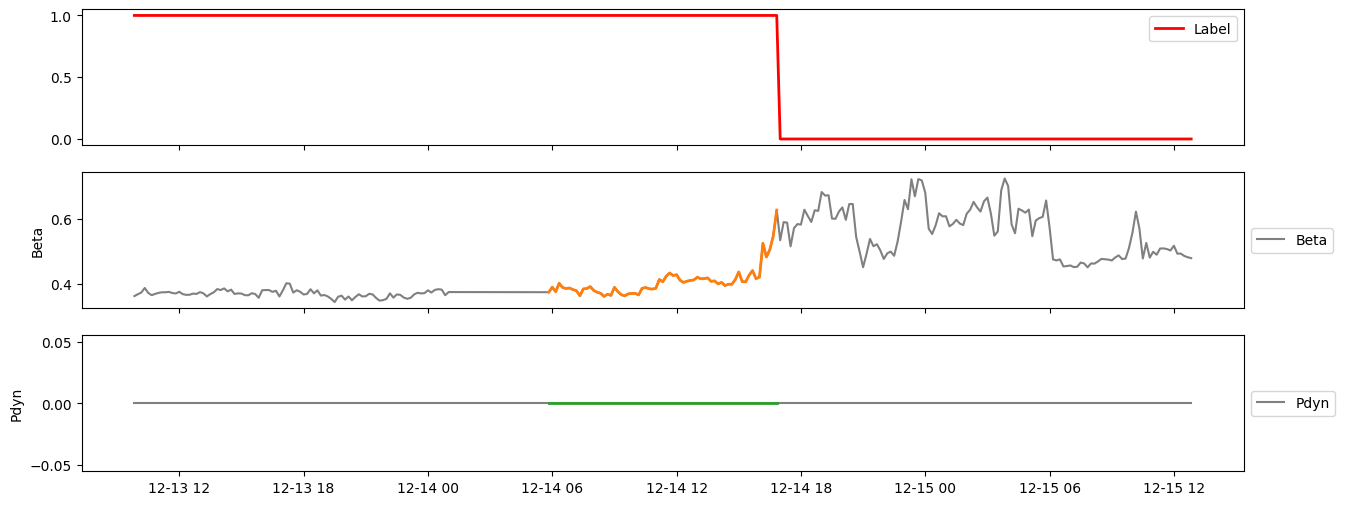

In [7]:
plot_event(
    10,
    X_train_preprocessed,
    y_train,
    ['Beta','Pdyn'],
    maxRange=[[-0.05, 1.7]],
    size=6,
    delta=20,
)

# Feature engineering

In [6]:
from feature_extractor import FeatureExtractor_ElasticMemory

feature_extractor_short_memory = FeatureExtractor_ElasticMemory(
        memories=['1h', '3h', '5h'],
        timelags=[1, 5, 10, 20, 40, -1, -5, -10, -20, -40]
    )

feature_extractor_medium_memory = FeatureExtractor_ElasticMemory(
        memories=['10h', '20h', '30h', '50h', '80h'],
        timelags=[60, 120, 300, -60, -120, -300]
    )

feature_extractor_long_memory = FeatureExtractor_ElasticMemory(
        memories=['80h', '90h', '100h'],
        timelags=[480, 600, -480, -600]
    )

X_short_memory = feature_extractor_short_memory.transform(X_train)
X_medium_memory = feature_extractor_medium_memory.transform(X_train)
X_long_memory = feature_extractor_long_memory.transform(X_train)

               [*] Preprocessing data with memories: ['1h', '3h', '5h']
               - Computing special parameters
               - Rolling mean
               - Rolling variance
               - Rolling min
               - Rolling max
               - CWT
               - Rolling quantile
               - Rolling median
               - Time lags
               - Filling missing values
               [*] Ready to enter the classifier
               [*] Preprocessing data with memories: ['10h', '20h', '30h', '50h', '80h']
               - Computing special parameters
               - Rolling mean
               - Rolling variance
               - Rolling min
               - Rolling max
               - CWT
               - Rolling quantile
               - Rolling median
               - Time lags
               - Filling missing values
               [*] Ready to enter the classifier
               [*] Preprocessing data with memories: ['80h', '90h', '100h']
               - Comp

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def mutual_info(X, y):
    return mutual_info_classif(X, y)


importances_short = mutual_info(X_short_memory, y_train)
importances_medium = mutual_info(X_medium_memory, y_train)
importances_long = mutual_info(X_long_memory, y_train)

In [ ]:
def importance_plot(importance, columns):
    feat_importances = pd.Series(importance, columns).sort_values(ascending=True)
    feat_importances.plot(kind='barh', figsize=(15, 23), colormap='viridis')
    plt.show()

In [ ]:
importance_plot(importances_short, X_short_memory.columns)

In [ ]:
importance_plot(importances_medium, X_medium_memory.columns)

In [ ]:
importance_plot(importances_long, X_long_memory.columns)

In [11]:
X_classic_transformed, _, X_solarstorm_transformed, _ = get_solarstorms(X_medium_memory)

In [12]:
description_classic = X_classic_transformed.describe()
description_solarstorm = X_solarstorm_transformed.describe()

In [13]:
description_classic

,B,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,RmsBob_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,451269.000000,4.512690e+05,4.512690e+05,451269.000000,451269.000000,451269.000000,451269.000000,4.512690e+05,4.512690e+05,451269.000000,...,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05,4.512690e+05
mean,6.267040,2.469252e+04,5.413163e+03,1.831450,0.002290,0.033405,0.086025,8.495767e+01,5.708985e+03,48.044449,...,2.408505e+09,2.406454e+09,1.166467e+00,1.164069e+00,1.160032e+00,1.148754e+00,1.165983e+00,1.162430e+00,1.158264e+00,1.150087e+00
std,6.699832,3.548794e+04,1.041353e+06,46.205700,21.226460,21.338907,21.428366,3.167900e+04,3.283204e+04,102.231506,...,2.393240e+09,2.387094e+09,3.673673e+01,3.673651e+01,3.673631e+01,3.673509e+01,3.673666e+01,3.673624e+01,3.673588e+01,3.673527e+01
min,0.265439,2.562922e+01,4.341866e-12,-571.169128,-3887.454602,-1739.728427,-1226.980703,-1.325182e+06,1.014206e+01,0.124947,...,0.000000e+00,0.000000e+00,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07,4.860670e-07
25%,4.136053,8.911351e+03,1.638548e+00,-15.935313,-0.171825,-0.616672,-0.984239,-1.928445e+03,2.048243e+03,24.441875,...,1.165286e+09,1.164246e+09,3.780306e-01,3.769752e-01,3.747559e-01,3.698196e-01,3.778784e-01,3.763788e-01,3.739453e-01,3.690578e-01
50%,5.428955,1.684817e+04,4.590734e+00,-0.982445,-0.020757,-0.082558,-0.128090,1.929642e+01,3.309597e+03,38.927834,...,1.920938e+09,1.920592e+09,6.539433e-01,6.527121e-01,6.506281e-01,6.457987e-01,6.537992e-01,6.522642e-01,6.502400e-01,6.458666e-01
75%,7.214952,3.067507e+04,1.220940e+01,15.789143,0.111739,0.436124,0.794840,1.962914e+03,5.210200e+03,58.183094,...,2.910268e+09,2.911014e+09,1.090200e+00,1.088712e+00,1.085466e+00,1.078999e+00,1.089966e+00,1.088134e+00,1.085023e+00,1.079475e+00
max,1419.378296,2.077230e+06,2.019438e+08,1270.100708,7918.848009,3881.422068,2751.149114,2.014620e+07,2.014620e+07,60134.953125,...,7.634294e+10,7.634294e+10,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04,1.421069e+04


In [14]:
description_solarstorm

,B,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,RmsBob_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,58565.000000,58565.000000,5.856500e+04,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,...,5.856500e+04,5.856500e+04,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000,58565.000000
mean,9.324401,12283.461914,1.075073e+01,-13.903497,-0.016922,-0.254026,-0.657940,47.136326,5177.539551,46.028755,...,3.176779e+09,3.192373e+09,0.240392,0.259415,0.291213,0.379514,0.243842,0.270264,0.301135,0.364079
std,4.869545,16101.686523,5.402963e+02,43.333828,0.909229,1.388221,1.929436,10673.098633,13861.922852,51.759113,...,3.065929e+09,3.098878e+09,1.514710,1.569195,1.623510,1.865599,1.530229,1.617192,1.688037,1.816179
min,1.033130,438.895996,1.040475e-07,-356.270477,-53.136498,-23.964835,-20.513382,-444853.187500,10.142059,0.439396,...,0.000000e+00,0.000000e+00,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
25%,6.239811,4430.412598,3.804597e-02,-30.766712,-0.036994,-0.336414,-0.987381,-1798.674316,1948.863403,23.833496,...,1.287915e+09,1.298415e+09,0.055525,0.055847,0.056892,0.059193,0.055529,0.056457,0.057789,0.060282
50%,8.273197,7235.054688,1.792060e-01,-10.608675,-0.004153,-0.066276,-0.286998,28.654226,3136.426514,37.533226,...,2.333521e+09,2.329286e+09,0.121705,0.123371,0.127328,0.137263,0.121988,0.124975,0.129788,0.140995
75%,10.933852,13572.250000,6.699113e-01,4.775337,0.015442,0.027807,-0.003180,1851.394653,4805.071289,55.345516,...,4.054267e+09,4.039729e+09,0.246534,0.251702,0.264787,0.302453,0.247614,0.257410,0.273641,0.310349
max,56.476120,343877.500000,3.767784e+04,363.143250,108.094189,53.095094,37.100341,390312.218750,500264.062500,1699.319458,...,5.227946e+10,5.053815e+10,194.106675,194.106675,194.106675,194.106675,194.106675,194.106675,194.106675,194.106675


In [15]:
variations = description_classic.to_numpy().astype(np.float32) - description_solarstorm.to_numpy().astype(np.float32)
variations = pd.DataFrame(columns=description_solarstorm.columns, index=description_solarstorm.index, data=variations)
variations

,B,Vth_2h_energy,Beta_2h_energy,Vth_cwt_20,Beta_cwt_2,Beta_cwt_10,Beta_cwt_20,Vth_fft_real,Vth_fft_abs,RmsBob_fft_abs,...,Range F 9_10,Range F 9_20,Beta_30min_max_-1,Beta_30min_max_-5,Beta_30min_max_-10,Beta_30min_max_-20,Beta_30min_max_1,Beta_30min_max_5,Beta_30min_max_10,Beta_30min_max_20
count,392704.000000,3.927040e+05,3.927040e+05,392704.000000,392704.000000,392704.000000,392704.000000,3.927040e+05,3.927040e+05,392704.000000,...,3.927040e+05,3.927040e+05,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000,392704.000000
mean,-3.057361,1.240906e+04,5.402412e+03,15.734946,0.019211,0.287431,0.743965,3.782135e+01,5.314453e+02,2.015694,...,-7.682739e+08,-7.859185e+08,0.926075,0.904654,0.868818,0.769240,0.922141,0.892165,0.857129,0.786008
std,1.830287,1.938625e+04,1.040813e+06,2.871872,20.317230,19.950687,19.498930,2.100590e+04,1.897011e+04,50.472393,...,-6.726892e+08,-7.117834e+08,35.222023,35.167313,35.112801,34.869492,35.206429,35.119045,35.047844,34.919094
min,-0.767691,-4.132668e+02,-1.040432e-07,-214.898651,-3834.318115,-1715.763550,-1206.467285,-8.803284e+05,0.000000e+00,-0.314449,...,0.000000e+00,0.000000e+00,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032,-0.000032
25%,-2.103758,4.480938e+03,1.600502e+00,14.831399,-0.134831,-0.280258,0.003142,-1.297711e+02,9.937952e+01,0.608379,...,-1.226290e+08,-1.341690e+08,0.322505,0.321128,0.317864,0.310627,0.322349,0.319922,0.316157,0.308775
50%,-2.844242,9.613119e+03,4.411528e+00,9.626230,-0.016605,-0.016283,0.158908,-9.357809e+00,1.731707e+02,1.394608,...,-4.125832e+08,-4.086938e+08,0.532239,0.529342,0.523301,0.508535,0.531811,0.527289,0.520452,0.504871
75%,-3.718900,1.710282e+04,1.153948e+01,11.013805,0.096297,0.408317,0.798020,1.115192e+02,4.051289e+02,2.837578,...,-1.143999e+09,-1.128715e+09,0.843665,0.837011,0.820679,0.776547,0.842353,0.830724,0.811382,0.769126
max,1362.902222,1.733352e+06,2.019061e+08,906.957458,7810.753906,3828.327148,2714.048828,1.975589e+07,1.964594e+07,58435.632812,...,2.406348e+10,2.580480e+10,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961,14016.584961


# Training classifier

# Ensemble

In [15]:
from feature_extractor import FeatureExtractor_ElasticMemory

fee = FeatureExtractor_ElasticMemory(
    memories=["1h", "5h", "12h", "25h", "36h", "50h", "70h", "100h"],
    timelags=[1, 5, 10, 50, 100, 300, 800, 1500, -1, -5, -10, -50, -100, -300, -800, -1500]
)

In [17]:
X_df_test = pipeline_preprocessing(fee.transform(X_test))

               [*] Preprocessing data with memories: ['1h', '5h', '12h', '25h', '36h', '50h', '70h', '100h']
               - Computing special parameters
               - Rolling mean
               - Rolling variance
               - Rolling min
               - Rolling max
               - CWT
               - Rolling quantile
               - Rolling median
               - Time lags
               - Filling missing values
               [*] Ready to enter the classifier


In [19]:
X_df = pipeline_preprocessing(fee.transform(X_train))

               [*] Preprocessing data with memories: ['1h', '5h', '12h', '25h', '36h', '50h', '70h', '100h']
               - Computing special parameters
               - Rolling mean
               - Rolling variance
               - Rolling min
               - Rolling max
               - CWT
               - Rolling quantile
               - Rolling median
               - Time lags
               - Filling missing values
               [*] Ready to enter the classifier


In [27]:
X_df

,B,Bx,Bx_rms,By,By_rms,Bz,Bz_rms,Na_nl,Np,Np_nl,...,Range F 9_800,Range F 9_1500,Range F 9_-1,Range F 9_-5,Range F 9_-10,Range F 9_-50,Range F 9_-100,Range F 9_-300,Range F 9_-800,Range F 9_-1500
1997-10-01 00:00:00,0.533521,0.590996,0.727151,0.514335,0.725399,0.349530,0.725639,0.730396,0.689083,0.703726,...,0.628182,0.584513,0.535576,0.536264,0.537850,0.535645,0.537641,0.537334,0.535863,0.534822
1997-10-01 00:10:00,0.529043,0.515232,0.724032,0.479375,0.724205,0.432045,0.724706,0.729052,0.688893,0.687837,...,0.627226,0.579564,0.535576,0.536264,0.537850,0.535645,0.537641,0.537334,0.535863,0.534822
1997-10-01 00:20:00,0.524608,0.381393,0.654443,0.439661,0.623714,0.553469,0.646590,0.735370,0.679528,0.668648,...,0.633442,0.577920,0.567615,0.536264,0.537850,0.535645,0.537641,0.537334,0.535863,0.534822
1997-10-01 00:30:00,0.520925,0.381718,0.678869,0.445799,0.623289,0.544223,0.628898,0.735139,0.679902,0.663147,...,0.633536,0.577228,0.466325,0.536264,0.537850,0.535645,0.537641,0.537334,0.535863,0.534822
1997-10-01 00:40:00,0.519007,0.364108,0.674527,0.434785,0.598937,0.554286,0.618093,0.739571,0.679524,0.668810,...,0.633400,0.577044,0.455767,0.536264,0.537850,0.535645,0.537641,0.537334,0.535863,0.534822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-31 23:10:00,0.452420,0.450798,0.563125,0.541407,0.566086,0.448614,0.578947,0.458120,0.539641,0.549709,...,0.470678,0.469054,0.502305,0.494273,0.505326,0.619333,0.585901,0.497299,0.550763,0.447179
2007-12-31 23:20:00,0.450134,0.428683,0.511189,0.493997,0.552112,0.416237,0.457264,0.457692,0.535321,0.542158,...,0.470678,0.469054,0.493498,0.507200,0.506433,0.623830,0.576233,0.503278,0.565059,0.449978
2007-12-31 23:30:00,0.446408,0.415809,0.476901,0.497621,0.546502,0.430720,0.444108,0.459372,0.532638,0.521982,...,0.470678,0.469054,0.490329,0.514414,0.505743,0.625833,0.575169,0.517113,0.566165,0.444574
2007-12-31 23:40:00,0.441553,0.414310,0.435574,0.513201,0.491729,0.447396,0.415552,0.466705,0.530796,0.524106,...,0.470678,0.469054,0.477383,0.510308,0.502194,0.609980,0.574045,0.502946,0.556188,0.451808


In [21]:
import test_environment.classifiers.ensemble.estimator as ensemble

model = ensemble.EnsembleClassifier(moving_avg=12, smoothing_threshold=0.6)
model.fit(X_df, y_train)

EnsembleClassifier(moving_avg=12, smoothing_threshold=0.6)

In [28]:
print(X_df_test.columns == X_df.columns)
y_test: pd.DataFrame = data_test[1]

y_pred = model.predict_proba(X_df_test)[:, 1]
y_pred = pd.DataFrame(index=y_test.index, data=y_pred, columns=["prediction"])
y_test = pd.DataFrame(index=y_test.index, data=y_test.values, columns=["prediction"])

y_pred

ValueError: Lengths must match to compare

In [ ]:
plot_event(
    30,
    X_df_test,
    y_pred['prediction'],
    features=X_df_test.columns[:],
    maxRange=[[-0.05, 1.7]],
    size=150,
    delta=20,
    events=turn_prediction_to_event_list(y_test)
)